# New section

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
diabetes_prediction_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')
diabetes_prediction_df = pd.DataFrame(diabetes_prediction_file)
diabetes_prediction_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [20]:
diabetes_prediction_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
diabetes_prediction_df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [23]:
diabetes_prediction_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [24]:
diabetes_prediction_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
diabetes_prediction_df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


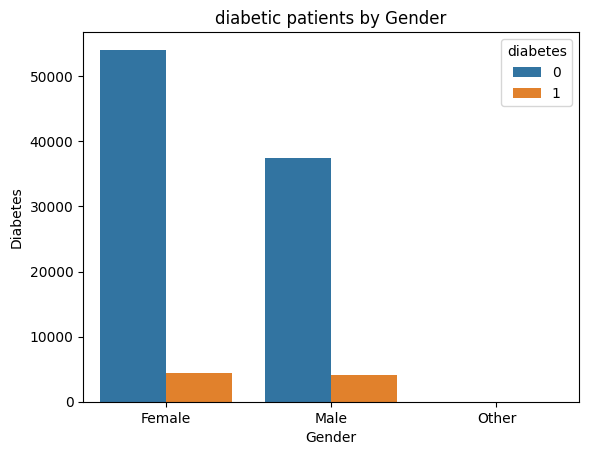

In [14]:
sn.countplot(x='gender', data=diabetes_prediction_df, hue='diabetes')
plt.title('diabetic patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Diabetes')
plt.show()

# Training the model based on diabetes_prediction dataset

In [16]:
# Convert diabetes_prediction dataset to numerical data representation
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [17]:
diabetes_prediction_df['age'] = encoder.fit_transform(diabetes_prediction_df['age'])
diabetes_prediction_df['HbA1c_level'] = encoder.fit_transform(diabetes_prediction_df['HbA1c_level'])
diabetes_prediction_df['blood_glucose_level']  = encoder.fit_transform(diabetes_prediction_df['blood_glucose_level'])
diabetes_prediction_df['bmi']  = encoder.fit_transform(diabetes_prediction_df['bmi'])
diabetes_prediction_df['diabetes']  = encoder.fit_transform(diabetes_prediction_df['diabetes'])
diabetes_prediction_df['gender']  = encoder.fit_transform(diabetes_prediction_df['gender'])
diabetes_prediction_df['heart_disease']  = encoder.fit_transform(diabetes_prediction_df['heart_disease'])
diabetes_prediction_df['hypertension']  = encoder.fit_transform(diabetes_prediction_df['hypertension'])
diabetes_prediction_df['smoking_history']  = encoder.fit_transform(diabetes_prediction_df['smoking_history'])


In [19]:
diabetes_prediction_df.head()

# Here we can see the the numerical dataset now

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,6,0
1,0,75,0,0,0,1547,11,0,0
2,1,49,0,0,4,1547,5,9,0
3,0,57,0,0,1,1160,4,8,0
4,1,97,1,1,1,829,3,8,0


<Axes: xlabel='gender', ylabel='count'>

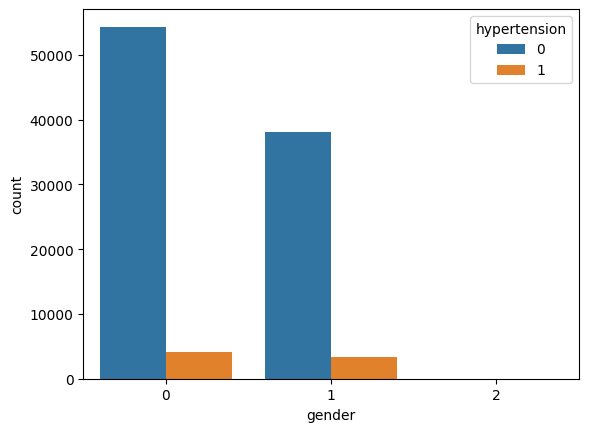

In [20]:
sn.countplot(x='gender', data=diabetes_prediction_df, hue='hypertension')

